## Using the DBSCAN algorithm to cluster localizations.

This notebook demonstrates how to cluster localizations using the DBSCAN algorithm. It also demonstrates how to work with the clustered data.

Note:
* The algorithm works in 2D or 3D, but in this example we just do 2D clustering.

References:
* [DBSCAN (Wikipedia)](https://en.wikipedia.org/wiki/DBSCAN).
* [Ester et al, Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220).

### Configuration

Create an empty directory somewhere on your computer and tell Python to go to that directory.

In [1]:
import matplotlib
import matplotlib.pyplot as pyplot
import numpy
import os

os.chdir("/home/hbabcock/Data/storm_analysis/jy_testing/")
print(os.getcwd())

numpy.random.seed(1)


/home/hbabcock/Data/storm_analysis/jy_testing


### Generate data to cluster

In this example we are just going to generate the clustering data synthetically.

In [2]:
import storm_analysis.jupyter_examples.clustering_data as clusteringData

clusteringData.makeClusters("clusters.hdf5", 40, 1000, 20000)

/home/hbabcock/pyenv/jupyter/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Added 0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

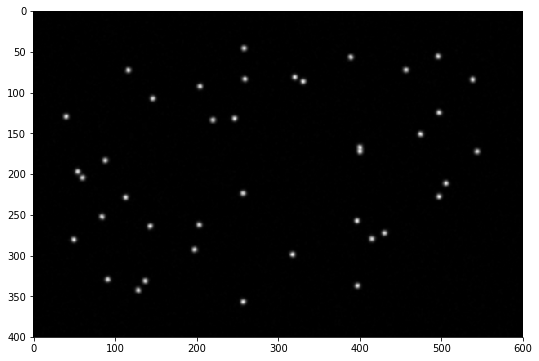

In [3]:
# Make an image from the data.
import storm_analysis.sa_utilities.hdf5_to_image as h5_image

sr_im = h5_image.render2DImage("clusters.hdf5", scale = 2, sigma = 1)

fig = pyplot.figure(figsize = (9, 6))
pyplot.imshow(sr_im, cmap = "gray")
pyplot.show()

### Cluster the data

Note:
* The results of the clustering are saved in the HDF5 that contained the tracks / localizations.
* Clustering is done on tracks if they are available, otherwise it is done on the localizations.

In [4]:
import storm_analysis.dbscan.dbscan_analysis as dbscanAnalysis

# The second parameter is the DBSCAN eps value in nanometers.
# The third parameter is the DBSCAN mc value.
dbscanAnalysis.findClusters("clusters.hdf5", 100.0, 50)

Warning! Clustering without using localization z value!
Warning! Clustering without regard to category!
Estimated number of clusters: 38


### RGB image of the clustering results

Processing cluster 0


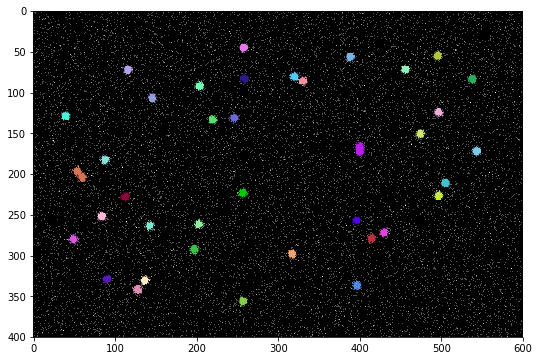

In [5]:
import storm_analysis.dbscan.cluster_images as clusterImages

[rgb_im, sum_im, num_clusters] = clusterImages.clusterImages("clusters.hdf5", 10, 3, scale = 2, 
                                                             show_unclustered = True)


fig = pyplot.figure(figsize = (9, 6))
pyplot.imshow(rgb_im, cmap = "gray")
pyplot.show()


### Create a file with some statistics for each cluster

In [6]:
stats_name = dbscanAnalysis.clusterStats("clusters.hdf5", 10)

print()
print("Cluster statistics:")
with open(stats_name) as fp:
    for line in fp:
        print(line.strip())

Cluster: 1 1005 localizations
Cluster: 2 1003 localizations
Cluster: 3 1006 localizations
Cluster: 4 1000 localizations
Cluster: 5 1007 localizations
Cluster: 6 998 localizations
Cluster: 7 1010 localizations
Cluster: 8 1004 localizations
Cluster: 9 1006 localizations
Cluster: 10 1009 localizations
Cluster: 11 1003 localizations
Cluster: 12 1004 localizations
Cluster: 13 1004 localizations
Cluster: 14 1009 localizations
Cluster: 15 2018 localizations
Cluster: 16 1004 localizations
Cluster: 17 1005 localizations
Cluster: 18 1002 localizations
Cluster: 19 1004 localizations
Cluster: 20 1000 localizations
Cluster: 21 1006 localizations
Cluster: 22 999 localizations
Cluster: 23 1000 localizations
Cluster: 24 2005 localizations
Cluster: 25 1004 localizations
Cluster: 26 1007 localizations
Cluster: 27 1007 localizations
Cluster: 28 999 localizations
Cluster: 29 998 localizations
Cluster: 30 1008 localizations
Cluster: 31 1003 localizations
Cluster: 32 1006 localizations
Cluster: 33 1010 loca

### Working with HDF5 clusters files

In [10]:
import storm_analysis.dbscan.clusters_sa_h5py as clSAH5Py

# The SAH5Clusters object is a sub-class of the SAH5Py object, so it provides all
# the methods of SAH5Py object in addition to a few of it's own.
#
with clSAH5Py.SAH5Clusters("clusters.hdf5") as cl_h5:
    
    # Get clustering program information.
    print("Analysis info", cl_h5.getClusteringInfo())
    
    # Get the number of clusters.
    print("Total clusters", cl_h5.getNClusters())
    
    # This is the recommended way to iterate over all the clusters. Like the tracks
    # and localizations iterators you can specify which fields you want if you don't
    # want to get them all.
    #
    print()
    for index, cluster in cl_h5.clustersIterator(min_size = 100):
        print("cluster {0:0d} <x> = {1:.3f}".format(index, numpy.mean(cluster['x'])))
        if (index >= 5):
            break
            
    # Note that if you only need the fields that are stored with each cluster this
    # iteration can be much faster. This is because the other fields have to be 
    # looked up from each localization/track that is in the cluster.
    
    # These are the fields that are stored with each cluster.
    print()
    print("Cluster fields:", cl_h5.getClustersFields())
    
    # This should be noticeably faster. As 'x' is available in the cluster so we
    # don't have to go the t
    print()
    for index, cluster in cl_h5.clustersIterator(min_size = 100, fields = ['x']):
        print("cluster {0:0d} <x> = {1:.3f}".format(index, numpy.mean(cluster['x'])))
        if (index >= 5):
            break

Analysis info dbscan,eps,100.000,mc,50,iz,True,ic,True,zf,1.000000
Total clusters 38

cluster 1 <x> = 128.480
cluster 2 <x> = 207.268
cluster 3 <x> = 20.074
cluster 4 <x> = 98.649
cluster 5 <x> = 58.141

Cluster fields: ['loc_id', 'track_id', 'x', 'y', 'z', 'category']

cluster 1 <x> = 128.480
cluster 2 <x> = 207.268
cluster 3 <x> = 20.074
cluster 4 <x> = 98.649
cluster 5 <x> = 58.141
